# ***Covertype Data Set***
### _with KNN Algorithm_

In [40]:
#Importing Libraries
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [42]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 1000)

#Reading the Covertype Data Set for KNN Analysis
data = pd.read_csv('covtype.csv')

In [43]:
#Data Dimension & Count of Values
print('Covertype Data Dimension: ')

print('Number of Records: ', data.shape[0])
print('Number of Features: ', data.shape[1])

Covertype Data Dimension: 
Number of Records:  15362
Number of Features:  55


In [44]:
#Names of Covertype Features
print('Feature Names:')
print(data.columns)

Feature Names:
Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39

In [45]:
#Data Type of Each Features
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15362 entries, 0 to 15361
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           15362 non-null  int64
 1   Aspect                              15362 non-null  int64
 2   Slope                               15362 non-null  int64
 3   Horizontal_Distance_To_Hydrology    15362 non-null  int64
 4   Vertical_Distance_To_Hydrology      15362 non-null  int64
 5   Horizontal_Distance_To_Roadways     15362 non-null  int64
 6   Hillshade_9am                       15362 non-null  int64
 7   Hillshade_Noon                      15362 non-null  int64
 8   Hillshade_3pm                       15362 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  15362 non-null  int64
 10  Wilderness_Area1                    15362 non-null  int64
 11  Wilderness_Area2                    15362 non-null  int64
 12  Wild

Text(0, 0.5, 'Data Types')

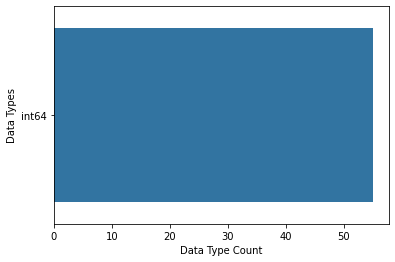

In [46]:
#Data Types Count of Covertype Data Set
plt.figure(figsize=(6,4))
sns.countplot(y=data.dtypes, data=data)
plt.xlabel("Data Type Count")
plt.ylabel("Data Types")

In [47]:
#Checking for Missing Values
data.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [48]:
#Checking the Data Distribution
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.0,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.0,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000,15362.000000
mean,2749.087944,156.227444,16.510025,225.244760,50.620427,1735.409712,212.693660,218.837782,134.996029,1585.621989,0.249902,0.032483,0.413293,0.304322,0.023109,0.040555,0.062622,0.054876,0.010741,0.042312,0.0,0.000065,0.000651,0.139435,0.026429,0.015688,0.030986,0.011001,0.0,0.007421,0.039839,0.003906,0.002994,0.009048,0.001042,0.022458,0.049277,0.016730,0.000065,0.003515,0.000976,0.000586,0.094910,0.051165,0.021612,0.044916,0.040099,0.001432,0.006640,0.000651,0.002213,0.047390,0.042768,0.029879,3.964848
std,414.419050,110.490819,8.411519,209.182497,60.906588,1326.408769,30.467283,22.715424,45.706128,1240.982873,0.432970,0.177284,0.492440,0.460135,0.150255,0.197262,0.242290,0.227745,0.103083,0.201307,0.0,0.008068,0.025506,0.346411,0.160412,0.124270,0.173284,0.104311,0.0,0.085827,0.195586,0.062376,0.054641,0.094694,0.032257,0.148172,0.216454,0.128261,0.008068,0.059186,0.031234,0.024198,0.293099,0.220342,0.145417,0.207126,0.196198,0.037817,0.081216,0.025506,0.046995,0.212478,0.202340,0.170259,2.004309
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2380.000000,64.000000,10.000000,67.000000,5.000000,769.000000,196.000000,207.000000,107.000000,738.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2750.000000,125.000000,15.000000,175.000000,32.000000,1329.000000,220.000000,222.000000,138.000000,1276.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3096.00000

In [49]:
print("Skewness of the features: ")
print(data.skew())

Skewness of the features: 
Elevation                               0.077887
Aspect                                  0.455616
Slope                                   0.522575
Horizontal_Distance_To_Hydrology        1.505159
Vertical_Distance_To_Hydrology          1.557475
Horizontal_Distance_To_Roadways         1.197893
Hillshade_9am                          -1.084287
Hillshade_Noon                         -0.936948
Hillshade_3pm                          -0.341369
Horizontal_Distance_To_Fire_Points      1.818543
Wilderness_Area1                        1.155415
Wilderness_Area2                        5.274901
Wilderness_Area3                        0.352200
Wilderness_Area4                        0.850634
Soil_Type1                              6.348603
Soil_Type2                              4.658821
Soil_Type3                              3.610840
Soil_Type4                              3.909483
Soil_Type5                              9.493761
Soil_Type6                              4.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]),
 [Text(0, 0, 'Elevation'),
  Text(1, 0, 'Aspect'),
  Text(2, 0, 'Slope'),
  Text(3, 0, 'Horizontal_Distance_To_Hydrology'),
  Text(4, 0, 'Vertical_Distance_To_Hydrology'),
  Text(5, 0, 'Horizontal_Distance_To_Roadways'),
  Text(6, 0, 'Hillshade_9am'),
  Text(7, 0, 'Hillshade_Noon'),
  Text(8, 0, 'Hillshade_3pm'),
  Text(9, 0, 'Horizontal_Distance_To_Fire_Points'),
  Text(10, 0, 'Wilderness_Area1'),
  Text(11, 0, 'Wilderness_Area2'),
  Text(12, 0, 'Wilderness_Area3'),
  Text(13, 0, 'Wilderness_Area4'),
  Text(14, 0, 'Soil_Type1'),
  Text(15, 0, 'Soil_Type2'),
  Text(16, 0, 'Soil_Type3'),
  Text(17, 0, 'Soil_Type4'),
  Text(18, 0, 'Soil_Type5'),
  Text(19, 0, 'Soil_Type6'),
  Text(20, 0, 'Soil_Type7'),
  Text(21, 0, 'Soil_Type8'),
  Text(

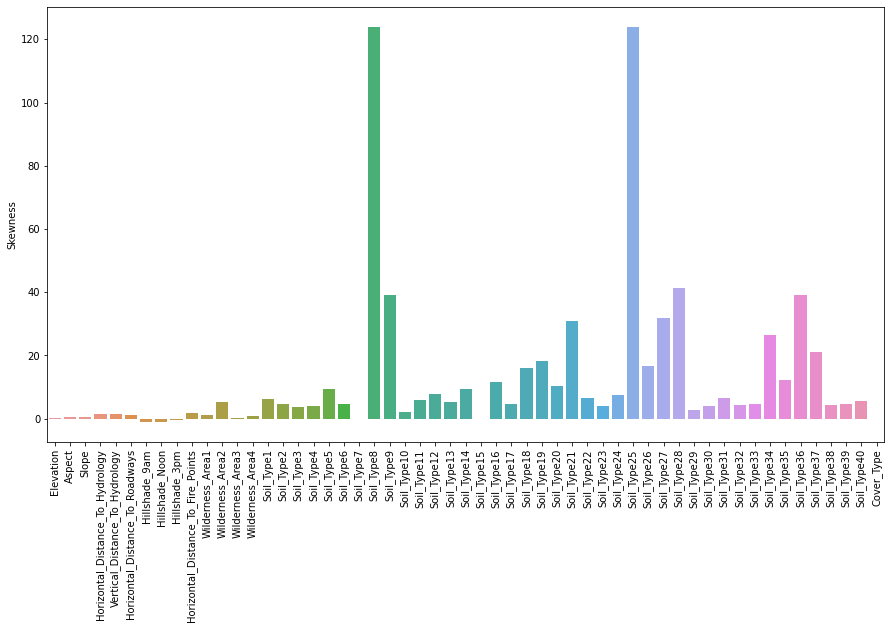

In [50]:
skew=data.skew()
skew_df=pd.DataFrame(skew, index=None,columns=['Skewness'])

plt.figure(figsize=(15,8))
sns.barplot(x=skew_df.index, y='Skewness', data=skew_df)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Cover_Type', ylabel='Size'>

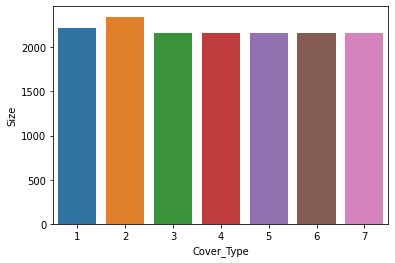

In [51]:
#Balance of the Data Set Class 
class_dist=data.groupby('Cover_Type').size()
class_label=pd.DataFrame(class_dist, columns=['Size'])

plt.figure(figsize=(6,4))
sns.barplot(x=class_label.index, y='Size', data=class_label)

In [52]:
#Percentile Distribution of the Classes
for i,num in enumerate(class_dist):
    per=(num/class_dist.sum()) * 100
    print('Cover_Type', class_dist.index[i])
    print('%.2f'% per, '%')

Cover_Type 1
14.43 %
Cover_Type 2
15.27 %
Cover_Type 3
14.06 %
Cover_Type 4
14.06 %
Cover_Type 5
14.06 %
Cover_Type 6
14.06 %
Cover_Type 7
14.06 %


In [53]:
#First Five Lines of the Covertype Data Set
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


### Data Modelling

In [54]:
x = data.loc[:, 'Elevation':'Soil_Type40']
y = data['Cover_Type']

In [55]:
#Features to be Removed Before the Model
rem = ['Hillshade_3pm','Soil_Type7','Soil_Type8','Soil_Type14','Soil_Type15',
     'Soil_Type21','Soil_Type25','Soil_Type28','Soil_Type36','Soil_Type37']

In [56]:
#Removing the Unwanted Features
x.drop(rem, axis=1, inplace=True)

In [57]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([4, 4, 1, ..., 1, 1, 1], dtype=int64)

In [58]:
#Splitting the Covertype Data Set into Train & Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [59]:
%%time
#Setuping Arrays to Store Training & Test Accuracies
neighbors = np.arange(1,7)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    #Fit the Model
    knn.fit(x_train, y_train)
    
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

CPU times: total: 57 s
Wall time: 23.6 s


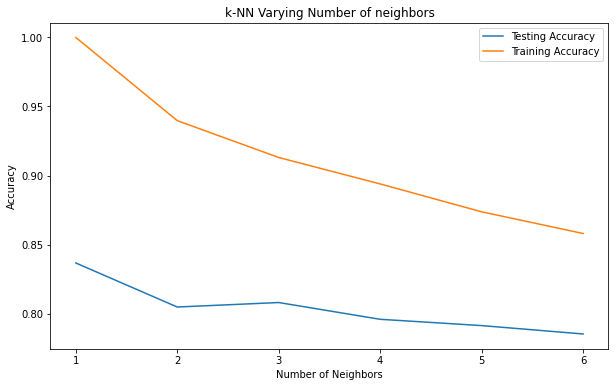

In [60]:
plt.figure(figsize=(10,6))
plt.title("k-NN Varying Number of neighbors")
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [61]:
#Setuping a KNN classifier with k Neighbors
#Using Eucedian Distance
knn = KNeighborsClassifier(n_neighbors=5)
#The Best Result is Neighbor Value k = 5

In [62]:
#Fit the Model
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [63]:
#Getting Accuracy
#Using 'score' Method For Accuracy in Classification Algorithms
Accuracy = knn.score(x_test, y_test)
print('KNN Accuracy: ', Accuracy) 

KNN Accuracy:  0.7912779344760251


In [64]:
from sklearn.preprocessing import MinMaxScaler
c = MinMaxScaler()
x_train = c.fit_transform(x_train)
x_test = c.fit_transform(x_test)

In [65]:
model = KNeighborsClassifier(n_neighbors = 66 )
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([1, 6, 0, ..., 3, 4, 0], dtype=int64)

In [66]:
from sklearn.metrics import accuracy_score,confusion_matrix
import sklearn.metrics as mt
#Normalization
accuracy_score(y_pred,y_test) * 100  

67.6068561510089

In [67]:
confusion_matrix(y_pred, y_test) 

array([[327, 128,   0,   0,  25,  10,  68],
       [161, 373,   8,   0,  54,  18,  11],
       [  2,  15, 354,  35,  19, 132,   3],
       [  0,   0, 105, 575,   0,  58,   0],
       [ 64, 127,  18,   0, 493,  15,   6],
       [ 15,  37, 171,  52,  39, 409,   0],
       [ 80,  15,   0,   0,   2,   0, 585]], dtype=int64)

In [68]:
print(confusion_matrix(y_test, y_pred))

[[327 161   2   0  64  15  80]
 [128 373  15   0 127  37  15]
 [  0   8 354 105  18 171   0]
 [  0   0  35 575   0  52   0]
 [ 25  54  19   0 493  39   2]
 [ 10  18 132  58  15 409   0]
 [ 68  11   3   0   6   0 585]]


In [69]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f"TN {tn}, FP {fp}, FN {fn}, TP {tp}")

ValueError: too many values to unpack (expected 4)

In [ ]:
sensitivity = TP /(TP + FN)
print('Sensitivity: ', sensitivity)

NameError: name 'TP' is not defined

In [ ]:
specificity = TN / (TN + FP)
print('Specificity : ', specificity)

NameError: name 'TN' is not defined

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.59      0.80      0.68        25
           2       0.55      0.38      0.44        16

    accuracy                           0.58        45
   macro avg       0.38      0.39      0.37        45
weighted avg       0.52      0.58      0.53        45



In [ ]:
prediction = knn.predict(x_test)

In [ ]:
from sklearn.metrics import roc_curve , auc
fpr,tpr,_= roc_curve(y_test, prediction)

ValueError: multiclass format is not supported

In [ ]:
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

NameError: name 'auc' is not defined

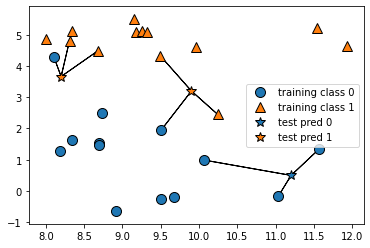

In [ ]:
import mglearn as mg
mg.plots.plot_knn_classification(n_neighbors=3)